# DataJam 2022 - QGis Warriors
Integrantes
- Jácome José
- Parra Karen
- Vasco Danny

## Tipo de reto
Reto #1 - Dateando por el agua

## Descripción
Este Jupyter Notebook está dirigido a limpiar datos de un archivo csv que contienen valores de celdas incorrectas

## Objetivo
- Eliminar los datos con valores na
- Corregir datos que no son legibles por los humanos

## Instrucciones
- Descargar los datos del Reto 1 y descomprimir en la carpeta `Reto1` de esta repositorio, los datos del Reto 1 estan en el siguiente [link de descarga ](
https://drive.google.com/drive/folders/1NnBdtYvd4XdZ8e349c6PDfByzIyvaAZ6?usp=sharing
)

## Sección de Carga de Librerías y Constantes

In [1]:
#Codigo para crear una lista del diccionario que nos dan
import pandas as pd
import numpy as np
import os
RUTA_PROYECCION_POBLACIONAL_CANTONAL = 'Reto1/Proyección Poblacional cantonal 2010-2020.xlsx'
RUTA_AUTORIZACIONES_RECURSO_HIDRICO = 'Reto1/Autorizaciones del Recurso Hídrico.xlsx'

## Exploracion de Datos
La función `head()` muestra en el Notebook las primeras cinco filas del archivo
- Proyeccion Cantonal

In [2]:
df_proyeccion_cantonal = pd.read_excel(RUTA_PROYECCION_POBLACIONAL_CANTONAL, header=2) # Header 2, cargar a partir de la segunda fila
df_recurso_hidrico_base_datos = pd.read_excel(RUTA_AUTORIZACIONES_RECURSO_HIDRICO, sheet_name="BDD")
df_recurso_hidrico_diccionario = pd.read_excel(RUTA_AUTORIZACIONES_RECURSO_HIDRICO, sheet_name="DDD", header=5)
df_recurso_hidrico_base_datos = df_recurso_hidrico_base_datos.replace('NAN', np.nan)
df_proyeccion_cantonal.head()

,Código,Nombre de canton,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,101,CUENCA,524563,535624,546864,558127,569416,580706,591996,603269,614539,625775,636996
1,102,GIRON,13192,13196,13197,13195,13187,13175,13157,13134,13107,13074,13037
2,103,GUALACEO,44487,44994,45501,45997,46482,46954,47411,47855,48286,48702,49104
3,104,NABON,16593,16686,16777,16863,16943,17017,17084,17145,17201,17250,17292
4,105,PAUTE,26559,26853,27146,27432,27712,27983,28246,28500,28747,28985,29214


- Autorizaciones Recurso Hidrico

In [3]:
df_recurso_hidrico_base_datos.head()

,ANIO,FECHA_REGISTRO,REGION_FUENTE,NOMBRE_EXDH_DZ,PROVINCIA_FUENTE,CODIGO_DPA_CANTON,CANTON_FUENTE,PARROQUIA_FUENTE,TIPO_PARROQUIA_FUENTE,NOMBRE_EXCAC_OT,...,NOM,NOMBRE_SUB_USO_APROVECHAMIENTO,GRUPO_USUARIO_AUTORIZADO,TIPO_USUARIO_AUTORIZADO,CODIGO_UNICO,CODIGO_PROCESO,ANIO_TRAMITE,NUMERO_PROCESO,CAUDAL_AUTORIZADO_LS,ESTADO_TRAMITE
0,2020.0,2020-03-13,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,NaN,USO EN GENERAL PARA PISCICOLA,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000514-114998,NA-TE-000514-2015,2015.0,514.0,2.000,VIGENTE
1,2020.0,2020-12-12,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,NaN,USO EN GENERAL PARA RECREATIVO,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000877-126320,NA-TE-000877-2016,2016.0,877.0,0.330,VIGENTE
2,2020.0,2020-01-07,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,LA UNIàN,URBANA,ESMERALDAS,...,NaN,EXTENSIVO A OTROS USOS DOMESTICOS,CENTROS O INSTITUCIONES EDUCATIVAS,SECCIONAL,ES-ES-000088-130016,ES-ES-000088-1989,1989.0,88.0,0.085,VIGENTE
3,2020.0,2020-03-18,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGšE,RuRAL,ESMERALDAS,...,NaN,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000007-111615,ES-ES-000007-2015,2015.0,7.0,2.320,VIGENTE
4,2020.0,2020-04-27,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGšE,RURAL,ESMERALDAS,...,NaN,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000364-111614,ES-ES-000364-2007,2007.0,364.0,5.550,CANCELADO


- Autorizaciones recurso hidrico - Diccionario
*Nota: A partir de la columna 6 del diccionario, se encuentran los valores a usar*

In [4]:
df_recurso_hidrico_diccionario.head()

,Nombre del campo,Descripción del campo
0,ANIO,Año que corresponde a la gestión de los datos.
1,FECHA_REGISTRO,Fecha corta que corresponde el registro o fila.
2,REGION_FUENTE,Nombre de la región natural que pertenece la f...
3,NOMBRE_EXDH_DZ,Nombre que conjuga a la demarcación hidrográfi...
4,PROVINCIA_FUENTE,Nombre de la provincia relacionada a la fuente...


## Exploración visual de los datos
### Exploración visual de los Recursos Hídricos
Explora los datos visualmente para poder conocer las características del conjunto de datos

<AxesSubplot:title={'center':'Valores columna PROVINCIA_FUENTE'}>

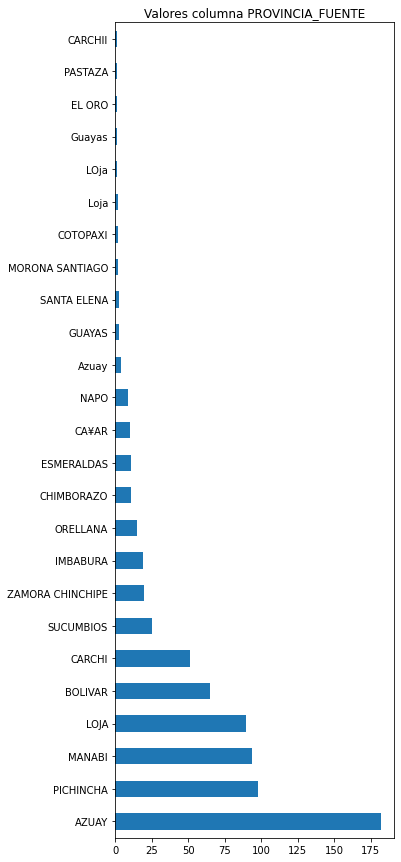

In [5]:
# NOMBRE_COLUMNA_EXPLORAR = "ANIO_CREACION" Ejemplo 1
NOMBRE_COLUMNA_EXPLORAR = "PROVINCIA_FUENTE"
 
df_recurso_hidrico_base_datos[NOMBRE_COLUMNA_EXPLORAR].value_counts().plot.barh(figsize = (5, 15), title=f"Valores columna {NOMBRE_COLUMNA_EXPLORAR}")

## Explorar nombres de valores de cada columna
Muestra todos los valores que hay en una columna para poder reconocer los valores defectuosos
### Valores defectuosos detectados
| Nombre Columna  | Valor Erróneo | Valor por corregir |
|-----------------|---------------|--------------------|
| NOMBRE_EXDH_DZ  | JUBONIES      | JUBONES            |
| PROVINCIA_FUENTE| CARCHII       | CARCHI             |
| TIPO_PARROQUIA_FUENTE  | RuRRAL        | RURAL       |
| ESTADO_TRAMITE  | VIGNTE        | VIGENTE            |
| ESTADO_TRAMITE  | VIENTE        | VIGENTE            |
| ESTADO_TRAMITE  | VIGE-NTE      | VIGENTE            |
| ESTADO_TRAMITE  | CA-NCELADO    | CANCELADO          |
| NOMBRE_FUENTE   | ESTERO SN     | ESTERO SIN NOMBRE  |
| TODAS           | ¥             | Ñ                  |
| TODAS           | Ö             | I                  |
| TODAS           | à             | O                  | 
| TODAS           | µ             | A                  |
| TODAS           | é             | U                  |
| TODAS           | Â             | E                  |     
| TODAS           | š             | U                  |     
| TODAS           | MINUSCULAS    | MAYUSCULAS         |

Nota: Valor SUBSECRETARIA se debe reemplazar en la columna `NOMBRE_EXCAC_OT`


In [6]:
for columna in df_recurso_hidrico_base_datos.columns:
    print(f"======================= Exploracion Valores Columna: {columna} =======================")
    lista_valores_celda = df_recurso_hidrico_base_datos[columna].value_counts().index.values.tolist()
    print(' ,'.join(map(str, lista_valores_celda))) # Imprimir values en una sola linea

======================= Exploracion Valores Columna: ANIO =======================
2020.0
======================= Exploracion Valores Columna: FECHA_REGISTRO =======================
1583798400000000000 ,1587513600000000000 ,1584489600000000000 ,1583884800000000000 ,1606694400000000000 ,1584057600000000000 ,1601856000000000000 ,1587600000000000000 ,1585008000000000000 ,1584316800000000000 ,1585612800000000000 ,1586649600000000000 ,1585440000000000000 ,1599523200000000000 ,1583712000000000000 ,1583971200000000000 ,1585180800000000000 ,1596499200000000000 ,1585872000000000000 ,1597190400000000000 ,1578096000000000000 ,1578873600000000000 ,1578441600000000000 ,1592438400000000000 ,1607385600000000000 ,1586563200000000000 ,1585699200000000000 ,1601337600000000000 ,1600387200000000000 ,1585267200000000000 ,1609200000000000000 ,1584662400000000000 ,1580169600000000000 ,1598572800000000000 ,1578009600000000000 ,1583452800000000000 ,1609372800000000000 ,1605225600000000000 ,1583366400000000000 ,

### Valores defecutosos detectados

In [7]:
for columna in df_proyeccion_cantonal.columns:
    print(f"======================= Exploracion Valores Columna: {columna} =======================")
    lista_valores_celda = df_proyeccion_cantonal[columna].value_counts().index.values.tolist()
    print(' ,'.join(map(str, lista_valores_celda))) # Imprimir values en una sola linea

======================= Exploracion Valores Columna: Código =======================
101 ,102 ,1309 ,1310 ,1311 ,1312 ,1313 ,1314 ,1315 ,1316 ,1317 ,1318 ,1319 ,1320 ,1321 ,1322 ,1401 ,1402 ,1403 ,1404 ,1405 ,1406 ,1407 ,1408 ,1409 ,1410 ,1411 ,1308 ,1307 ,1306 ,1205 ,1110 ,1111 ,1112 ,1113 ,1114 ,1115 ,1116 ,1201 ,1202 ,1203 ,1204 ,1206 ,1305 ,1207 ,1208 ,1209 ,1210 ,1211 ,1212 ,1213 ,1301 ,1302 ,1303 ,1304 ,1412 ,1501 ,1503 ,2105 ,1906 ,1907 ,1908 ,1909 ,2001 ,2002 ,2003 ,2101 ,2102 ,2103 ,2104 ,2106 ,1904 ,2107 ,2201 ,2202 ,2203 ,2204 ,2301 ,2401 ,2402 ,2403 ,9001 ,9003 ,1905 ,1903 ,1504 ,1707 ,1507 ,1509 ,1601 ,1602 ,1603 ,1604 ,1701 ,1702 ,1703 ,1704 ,1705 ,1708 ,1902 ,1709 ,1801 ,1802 ,1803 ,1804 ,1805 ,1806 ,1807 ,1808 ,1809 ,1901 ,1109 ,1108 ,1107 ,507 ,402 ,403 ,404 ,405 ,406 ,501 ,502 ,503 ,504 ,505 ,506 ,601 ,307 ,602 ,603 ,604 ,605 ,606 ,607 ,608 ,609 ,610 ,701 ,702 ,401 ,306 ,704 ,114 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,115 ,305 ,201 ,202 ,203 ,204 ,205 

## Identificacion de valores nullos
## DataFrame Recursos Hídricos
A través de la exploración a través de pandas, se evalua por valores nulos

In [8]:
print("Impresion de Valores: Nulo")
print(df_recurso_hidrico_base_datos.isnull().sum()) #Me permite comprobar que el reemplazo se hizo correctamente, deberia tener valores TRUE :(
print("Impresion de Valores: No hay")
print(df_recurso_hidrico_base_datos.isna().sum())

Impresion de Valores: Nulo
ANIO                                2
FECHA_REGISTRO                      2
REGION_FUENTE                       2
NOMBRE_EXDH_DZ                      2
PROVINCIA_FUENTE                    2
CODIGO_DPA_CANTON                   2
CANTON_FUENTE                       2
PARROQUIA_FUENTE                    2
TIPO_PARROQUIA_FUENTE               2
NOMBRE_EXCAC_OT                     2
COORDENADA_X_FUENTE                 2
COORDENADA_Y_FUENTE                 2
COTA_FUENTE                         2
PFAFSTETTER                         2
SISTEMA_FUENTE                      2
CUENCA_FUENTE                       2
SUB_CUENCA_FUENTE                   2
MICROCUENCA_FUENTE                  2
TIPO_FUENTE                         2
SITIO_CAPTACION_FUENTE              2
NOMBRE_FUENTE                       2
NOMBRE_USO_APROVECHAMIENTO          2
NOM                               723
NOMBRE_SUB_USO_APROVECHAMIENTO      2
GRUPO_USUARIO_AUTORIZADO            2
TIPO_USUARIO_AUTORIZADO

## DataFrame Proyección Cantonal
Identificación de valores nulos

In [9]:
print("Impresion de Valores: Nulo")
print(df_proyeccion_cantonal.isnull().sum()) #Me permite comprobar que el reemplazo se hizo correctamente, deberia tener valores TRUE :(
print("Impresion de Valores: No hay")
print(df_proyeccion_cantonal.isna().sum())

Impresion de Valores: Nulo
Código              0
Nombre de canton    0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
2018                0
2019                0
2020                0
dtype: int64
Impresion de Valores: No hay
Código              0
Nombre de canton    0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
2018                0
2019                0
2020                0
dtype: int64


# Limpieza de datos
En el archivo `Autorizaciones del Recurso Hídrico.xlsx` se presentan los campos de un diccionario y una base de datos. 
En esta sección los datos van a ser modificados de acuerdo a las necesidades del dataset, se empieza con eliminar los datos que no estan en el diccionario inicial
## Limpieza de columnas que no están en los diccionarios

In [10]:
lista_nombres_columnas = df_recurso_hidrico_diccionario['Nombre del campo'].tolist()
#print(lista_nombres_columnas)
#Codigo para comparar los encabezados de la tabla con la lista del diccionario
columnas_iniciales = df_recurso_hidrico_base_datos.columns.tolist()
df_recurso_hidrico_base_datos_filtrado = pd.DataFrame(df_recurso_hidrico_base_datos, columns=lista_nombres_columnas)
columnas_finales = df_recurso_hidrico_base_datos_filtrado.columns.tolist()

print(f"Columna(s) borrada")
for columna_analisis in columnas_iniciales:
    if columna_analisis not in columnas_finales:
        print(f"- {columna_analisis}")
print("Total columnas finales: ", len(columnas_finales))
df_recurso_hidrico_base_datos_filtrado.head()

Columna(s) borrada
- NOM
Total columnas finales:  31


,ANIO,FECHA_REGISTRO,REGION_FUENTE,NOMBRE_EXDH_DZ,PROVINCIA_FUENTE,CODIGO_DPA_CANTON,CANTON_FUENTE,PARROQUIA_FUENTE,TIPO_PARROQUIA_FUENTE,NOMBRE_EXCAC_OT,...,NOMBRE_USO_APROVECHAMIENTO,NOMBRE_SUB_USO_APROVECHAMIENTO,GRUPO_USUARIO_AUTORIZADO,TIPO_USUARIO_AUTORIZADO,CODIGO_UNICO,CODIGO_PROCESO,ANIO_TRAMITE,NUMERO_PROCESO,CAUDAL_AUTORIZADO_LS,ESTADO_TRAMITE
0,2020.0,2020-03-13,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,ACUICULTURA,USO EN GENERAL PARA PISCICOLA,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000514-114998,NA-TE-000514-2015,2015.0,514.0,2.000,VIGENTE
1,2020.0,2020-12-12,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,TURISTICO,USO EN GENERAL PARA RECREATIVO,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000877-126320,NA-TE-000877-2016,2016.0,877.0,0.330,VIGENTE
2,2020.0,2020-01-07,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,LA UNIàN,URBANA,ESMERALDAS,...,CONSUMO HUMANO,EXTENSIVO A OTROS USOS DOMESTICOS,CENTROS O INSTITUCIONES EDUCATIVAS,SECCIONAL,ES-ES-000088-130016,ES-ES-000088-1989,1989.0,88.0,0.085,VIGENTE
3,2020.0,2020-03-18,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGšE,RuRAL,ESMERALDAS,...,RIEGO,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000007-111615,ES-ES-000007-2015,2015.0,7.0,2.320,VIGENTE
4,2020.0,2020-04-27,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGšE,RURAL,ESMERALDAS,...,RIEGO,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000364-111614,ES-ES-000364-2007,2007.0,364.0,5.550,CANCELADO


## Limpieza de valores nulos
Se evalua datos que no presenten información, y se elimina filas donde la perdida de información corresponda a 13 atributos

In [11]:
df_recurso_hidrico_base_datos_filtrado.replace(["999",".", 'NAN', "nan"],np.nan, inplace=True)
# Poner nombres de columnas - 1 en el Thresh
df_recurso_hidrico_base_datos_sin_nulos = df_recurso_hidrico_base_datos_filtrado.dropna(thresh=30)
df_recurso_hidrico_base_datos_sin_nulos.head()

,ANIO,FECHA_REGISTRO,REGION_FUENTE,NOMBRE_EXDH_DZ,PROVINCIA_FUENTE,CODIGO_DPA_CANTON,CANTON_FUENTE,PARROQUIA_FUENTE,TIPO_PARROQUIA_FUENTE,NOMBRE_EXCAC_OT,...,NOMBRE_USO_APROVECHAMIENTO,NOMBRE_SUB_USO_APROVECHAMIENTO,GRUPO_USUARIO_AUTORIZADO,TIPO_USUARIO_AUTORIZADO,CODIGO_UNICO,CODIGO_PROCESO,ANIO_TRAMITE,NUMERO_PROCESO,CAUDAL_AUTORIZADO_LS,ESTADO_TRAMITE
0,2020.0,2020-03-13,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,ACUICULTURA,USO EN GENERAL PARA PISCICOLA,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000514-114998,NA-TE-000514-2015,2015.0,514.0,2.000,VIGENTE
1,2020.0,2020-12-12,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,TURISTICO,USO EN GENERAL PARA RECREATIVO,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000877-126320,NA-TE-000877-2016,2016.0,877.0,0.330,VIGENTE
2,2020.0,2020-01-07,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,LA UNIàN,URBANA,ESMERALDAS,...,CONSUMO HUMANO,EXTENSIVO A OTROS USOS DOMESTICOS,CENTROS O INSTITUCIONES EDUCATIVAS,SECCIONAL,ES-ES-000088-130016,ES-ES-000088-1989,1989.0,88.0,0.085,VIGENTE
3,2020.0,2020-03-18,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGšE,RuRAL,ESMERALDAS,...,RIEGO,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000007-111615,ES-ES-000007-2015,2015.0,7.0,2.320,VIGENTE
4,2020.0,2020-04-27,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGšE,RURAL,ESMERALDAS,...,RIEGO,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000364-111614,ES-ES-000364-2007,2007.0,364.0,5.550,CANCELADO


## Reemplazar datos que no están formateados adecuadamente
Se ha detectado que en el archivo `Autorizaciones del Recurso Hídrico.xlsx` hay valores extraños, por lo que se procede a hacer el reemplazo
A través de la exploración de datos en cada columna, se analiza los caracteres extraños y se hace los reemplazos
Guia para usar esta funcion:
- Especificar el diccionario reemplazos de la siguiente forma, donde `valor_reemplazar` es el valor a reemplazar y `valor_real` es el valor que debería tener la celda
```bash
{
    "valor_reemplazar": "valor_real"
}
```

In [16]:
df_recurso_hidrico_base_datos_archivo_final = df_recurso_hidrico_base_datos_sin_nulos.copy()
diccionario_reemplazos = {
    "JUBONIES": "JUBONES",
    "CARCHII": "CARCHI",
    "RuRRAL": "RURAL",
    "VIGNTE": "VIGENTE",
    "VIENTE": "VIGENTE",
    "VIGE-NTE": "VIGENTE",
    "CA-NCELADO": "CANCELADO",
    "¥": "NI",
    "Ö": "I",
    "à": "O",
    "µ": "A",
    "Â": "E",
    "š": "U",
    "é": "U", # La Parroquina MANé no existe, su valor real es MANÚ
}
for columna in df_recurso_hidrico_base_datos_archivo_final:
    if df_recurso_hidrico_base_datos_archivo_final[columna].dtype == object: # Verifica que la columna sea cadena de texto
        for valor_antiguo in diccionario_reemplazos.keys():
            valor_nuevo = diccionario_reemplazos[valor_antiguo]
            if len(valor_antiguo) == 1: # Reemplazar caracteres
                df_recurso_hidrico_base_datos_archivo_final[columna]=df_recurso_hidrico_base_datos_archivo_final[columna].str.replace(valor_antiguo,valor_nuevo)
            elif len(valor_antiguo) > 1: # Reemplazar texto
                df_recurso_hidrico_base_datos_archivo_final[columna]=df_recurso_hidrico_base_datos_archivo_final[columna].replace(valor_antiguo, valor_nuevo)
        df_recurso_hidrico_base_datos_archivo_final[columna]=df_recurso_hidrico_base_datos_archivo_final[columna].str.upper() #Hacer coincidir un solo estilo al poner a todas en mayuscula
df_recurso_hidrico_base_datos_archivo_final.head()

,ANIO,FECHA_REGISTRO,REGION_FUENTE,NOMBRE_EXDH_DZ,PROVINCIA_FUENTE,CODIGO_DPA_CANTON,CANTON_FUENTE,PARROQUIA_FUENTE,TIPO_PARROQUIA_FUENTE,NOMBRE_EXCAC_OT,...,NOMBRE_USO_APROVECHAMIENTO,NOMBRE_SUB_USO_APROVECHAMIENTO,GRUPO_USUARIO_AUTORIZADO,TIPO_USUARIO_AUTORIZADO,CODIGO_UNICO,CODIGO_PROCESO,ANIO_TRAMITE,NUMERO_PROCESO,CAUDAL_AUTORIZADO_LS,ESTADO_TRAMITE
0,2020.0,2020-03-13,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,ACUICULTURA,USO EN GENERAL PARA PISCICOLA,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000514-114998,NA-TE-000514-2015,2015.0,514.0,2.000,VIGENTE
1,2020.0,2020-12-12,ORIENTE,NAPO,NAPO,1503.0,ARCHIDONA,COTUNDO,RURAL,TENA,...,TURISTICO,USO EN GENERAL PARA RECREATIVO,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,NA-TE-000877-126320,NA-TE-000877-2016,2016.0,877.0,0.330,VIGENTE
2,2020.0,2020-01-07,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,LA UNION,URBANA,ESMERALDAS,...,CONSUMO HUMANO,EXTENSIVO A OTROS USOS DOMESTICOS,CENTROS O INSTITUCIONES EDUCATIVAS,SECCIONAL,ES-ES-000088-130016,ES-ES-000088-1989,1989.0,88.0,0.085,VIGENTE
3,2020.0,2020-03-18,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGUE,RURAL,ESMERALDAS,...,RIEGO,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000007-111615,ES-ES-000007-2015,2015.0,7.0,2.320,VIGENTE
4,2020.0,2020-04-27,COSTA,ESMERALDAS,ESMERALDAS,806.0,ATACAMES,TONCHIGUE,RURAL,ESMERALDAS,...,RIEGO,CULTIVOS DE PASTIZALES,"PERSONAS NATURALES, HEREDEROS, FAMILIAS",PARTICULAR,ES-ES-000364-111614,ES-ES-000364-2007,2007.0,364.0,5.550,CANCELADO


## Encontrar valores ceros en filas en filas con información
Se evalua los valores nulos que se encuentren en filas que si presentan información y se decide manualmente si eliminarlos o modificarlos

Nota: Columna 13, los valores tienen una nomenclatura donde se puede considera una de ellas el valor de `0`

In [17]:
# Busca las filas y columnas de los datos que son cero
resultado = list(zip(*np.where(df_recurso_hidrico_base_datos_archivo_final.values == 0)))
columnas_obviar = [13] # Poner valores en forma de lista de los indices de columnas a obviar
resultado = [ par_fila_columna for par_fila_columna in resultado if par_fila_columna[1] not in columnas_obviar]
nombres_columnas = df_recurso_hidrico_base_datos_archivo_final.columns.tolist()
for fila, columna in resultado:
    print(f"Por favor revisar la columna: {nombres_columnas[columna]}, fila hoja de cálculo: {fila + 2}")

Por favor revisar la columna: ANIO_TRAMITE, fila hoja de cálculo: 268
Por favor revisar la columna: CAUDAL_AUTORIZADO_LS, fila hoja de cálculo: 537


## Cambio manual de valores erroneos
En esta sección cambiamos manualmente los valores érroneos detectados, por valores que sean más comprehensibles

In [18]:
df_recurso_hidrico_base_datos_archivo_final.iloc[266,27]=2014
df_recurso_hidrico_base_datos_archivo_final.iloc[266, 27]


2014.0

# Guardar Archivo

In [19]:
nombre_base_archivo_cambiado = os.path.basename(RUTA_AUTORIZACIONES_RECURSO_HIDRICO)
nombre_archivo, extension = nombre_base_archivo_cambiado.split(".")
NUEVO_NOMBRE_ARCHIVO = f"Reto1/{nombre_archivo}_filtrado.{extension}"
df_recurso_hidrico_base_datos_archivo_final.to_excel(NUEVO_NOMBRE_ARCHIVO, index=False) # No Guardar el índice